Measuring RMSD and other metrics
================================

In [9]:
from pathlib import Path
import sys
from sys import stdout
import inspect

debug_local = True#False
local = Path("..").resolve()
code = local / "mm"
data  = local / "data"
input = data / "input"
output = data / "output"

if debug_local and code.exists():
    sys.path.insert(0, code.as_posix())
    print("extending pathes with local yspecies")
    print(sys.path)
    %load_ext autoreload
    %autoreload 2

extending pathes with local yspecies
['/data/sources/antibody-mm/mm', '/data/sources/antibody-mm/mm', '/data/sources/antibody-mm/notebooks', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python39.zip', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python3.9', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python3.9/lib-dynload', '', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python3.9/site-packages', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python3.9/site-packages/IPython/extensions', '/home/antonkulaga/.ipython']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from prody import *
from pylab import *
ion()

In [5]:
def printMatch(match):
   print(f'Chain 1     : {match[0]}')
   print(f'Chain 2     : {match[1]}')
   print(f'Length      : {len(match[0])}')
   print(f'Seq identity: {match[2]}')
   print(f'Seq overlap : {match[3]}')
   print(f'RMSD        : {calcRMSD(match[0], match[1])}\n')

In [11]:
input

PosixPath('/data/sources/antibody-mm/data/input')

In [13]:
ra_real = parsePDB(str(input / "RA" /"1adq_fixed_RF_short.pdb"))

@> 3481 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [14]:
ra_predicted = parsePDB(str(input / "RA" / "1ADQ_FV_deep.pdb" ))

@> 3481 atoms and 1 coordinate set(s) were parsed in 0.03s.


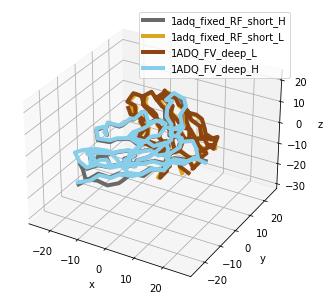

In [15]:
showProtein(ra_real, ra_predicted)
legend()

In [16]:
matches = matchChains(ra_real, ra_predicted)
for match in matches:
    printMatch(match)

@> Checking AtomGroup 1adq_fixed_RF_short: 2 chains are identified
@> Checking AtomGroup 1ADQ_FV_deep: 2 chains are identified
@> Trying to match chains based on residue numbers and names:
@>   Comparing Chain H from 1adq_fixed_RF_short (len=123) and Chain L from 1ADQ_FV_deep (len=108):
@> 	Failed to match chains (seqid=25%, overlap=88%).
@>   Comparing Chain H from 1adq_fixed_RF_short (len=123) and Chain H from 1ADQ_FV_deep (len=123):
@> 	Match: 123 residues match with 100% sequence identity and 100% overlap.
@>   Comparing Chain L from 1adq_fixed_RF_short (len=108) and Chain L from 1ADQ_FV_deep (len=108):
@> 	Match: 108 residues match with 100% sequence identity and 100% overlap.
@>   Comparing Chain L from 1adq_fixed_RF_short (len=108) and Chain H from 1ADQ_FV_deep (len=123):
@> 	Failed to match chains (seqid=25%, overlap=88%).


Chain 1     : AtomMap Chain H from 1adq_fixed_RF_short -> Chain H from 1ADQ_FV_deep
Chain 2     : AtomMap Chain H from 1ADQ_FV_deep -> Chain H from 1adq_fixed_RF_short
Length      : 123
Seq identity: 100.0
Seq overlap : 100.0
RMSD        : 2.3432008162000653

Chain 1     : AtomMap Chain L from 1adq_fixed_RF_short -> Chain L from 1ADQ_FV_deep
Chain 2     : AtomMap Chain L from 1ADQ_FV_deep -> Chain L from 1adq_fixed_RF_short
Length      : 108
Seq identity: 100.0
Seq overlap : 100.0
RMSD        : 0.5736142964668081

